# INFO 2950 Project

## hahaha


## Research Question

example bla bla




In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/Users/jonathankim/opt/anaconda3/envs/info2950/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Problem 1 (5 Points)

Let's start with three numpy arrays `x1`, `y1` and `y2`. Run the cell below to initialize these variables

In [2]:
x1 = np.array([50, 6, 20, 72, 38, 17, 3, 88, 59, 13, 8, 89, 52, 1, 83, 91, 59, 70, 43, 7, 46, 34, 77, 80, 35])
y1 = np.array([129.41785382528082, 14.543392470720384, 65.69221345251731, 204.57574641020062, 84.1461656319166, 36.896576076270485, 50.730320387684785, 221.68586822882273, 125.51314035162619, 47.31400108964912, 10.914557679688443, 193.10675616074357, 127.54905678915085, -41.082006116444944, 148.12705418717417, 195.19281176897567, 111.92922199163941, 169.85618331488183, 78.54939811196972, -15.057592533382284, 144.64121922303886, 75.3555924878366, 179.4382051171981, 148.88129534466358, 69.64043188687043])
y2 = np.array([3815.417853825281, 59.543392470720384, 639.1922134525173, 7889.075746410201, 2201.1461656319166, 447.6465760762705, 58.980320387684785, 11726.185868228822, 5271.763140351626, 283.06400108964914, 95.41455767968844, 11961.856756160743, 4117.049056789151, -42.332006116444944, 10376.377054187175, 12501.442811768975, 5258.17922199164, 7430.8561833148815, 2796.79939811197, 48.192407466617716, 3259.6412192230387, 1765.3555924878367, 8975.188205117198, 9647.381295344663, 1861.8904318868704])

Now, create two scatterplots using the `regplot` function in `seaborn`. The first one should plot the pair of points in `x1` and `y1`. And, the second one for `x1` and `y2`. `regplot` is a scatter plot that also fits a regression line.


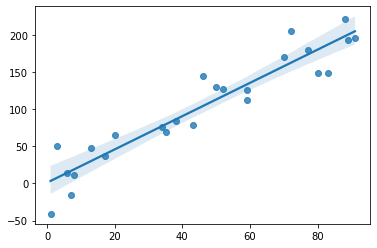

In [4]:
# scatterplot for x1 and y1
x1y1plot = sns.regplot(x=x1, y=y1)

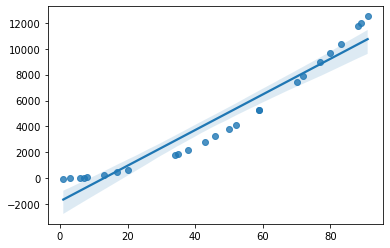

In [5]:
# scatterplot for x1 and y2
x1y2plot = sns.regplot(x=x1, y=y2)

**Describe the two plots and comment on whether they appear to be appropriate for linear regression, and why or why not.**

Your answer: The first plot appear to be appropriate for linear regression while the second one does not. The first plot data points scatter around the liner line without a pattern, randomly distributed along the line, thus appropriate for linear regression. However, the second plot's data point seems to be non-random distribution along the linear line, almost shaped as quadratic line. 

## Problem 2 (5 Points)

Create a `lineplot` using the points of `x1` and `y1`.

Now, let's refresh our memory. What's the equation of a line? It's `y = mx + c` where `m` is the **slope** and `c` is the **y-intercept** of that line.

Here, you need to compute the slope and intercept of the line created by plotting `(x1, y1)`. Use numpy operations to compute these values. Then, write the equation of this line in `y = mx + c` form. You can use [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) function of numpy to compute the slope and intercept. This function fits the input data inside a polynomial function. Here, you have to provide the degree of polynomial function along with data as parameter to `np.polyfit`. The degree for a *linear* function will be 1.

<AxesSubplot:>

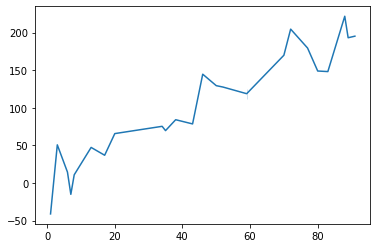

In [6]:
# lineplot for x1 and y1
sns.lineplot(x=x1,y=y1)

In [12]:
# compute slope and intercept of line containing (x1, y1) pairs
np.polyfit(x1,y1,1)

array([2.23681788, 1.01393052])

Compute the slope of this line using the vector formulation given below:

$ slope =  \frac {\sum_{i = 1} ^{n}(x_i - mean(X)) (y_i - mean(Y))} {\sum_{i = 1} ^{n}(x_i - mean(X))^2} $ 

Here, `X` and `Y` are equivalent to numpy arrays `x1` and `y1` respectively in our case and `n` is their number of elements. **Confidence Check:** the slope computed here should be equal to the one you got from numpy operation in previous cell. 

In [32]:
# compute slope using the given vector formula
xmean = x1.mean()
ymean = y1.mean()
numerator1 = x1 - xmean
numerator2 = y1 - ymean
denominator = numerator1*numerator1
numerator = numerator2 * numerator1
result = numerator.sum() / denominator.sum()
result

2.2368178793459474

## Problem 3 (5 Points)

Install the `scikit-learn` module to your INFO 2950 environment. Remember, you can do this through Anaconda Navigator. Refer to hw0 (on how to set up Python and a virtual environment) if you need a refresher on installing modules to a specific environment. 

Train a [scikit-learn](https://scikit-learn.org/stable/index.html) linear regression model to **predict slope and intercept** of the lines created through plotting pairs of `(x1, y1)` and `(x1, y2)`. Refer to the documentation of scikit-learn [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

**Heads-up:** The first input to fit a `LinearRegression` has to be a 2D array.

In [30]:
from sklearn.linear_model import LinearRegression

In [126]:
# scikit-learn linear regression

x1_2d = np.reshape(x1,(-1,1))
y1_2d = np.reshape(y1,(-1,1))
y2_2d = np.reshape(y2,(-1,1))

reg1 = LinearRegression().fit(x1_2d, y1_2d)
reg2 = LinearRegression().fit(x1_2d, y2_2d)

print("x1,y1")
print("slope: ", reg1.coef_,
     "intercept: ", reg1.intercept_)

print("x1,y2")
print("slope: ", reg2.coef_,
     "intercept: ", reg2.intercept_)


x1,y1
slope:  [[2.23681788]] intercept:  [1.01393052]
x1,y2
slope:  [[137.50973875]] intercept:  [-1778.13217781]


Is the `slope` you got here *exactly* the same as you got before? Probably, NO. It's because of the precision of `float` type variables. You can print any `float` variable up to the specific decimal point you want to. You have to use python format string for that. You can find more about printing a formatted string [here](https://docs.python.org/3/tutorial/inputoutput.html).



```
>>> a = 1/7
>>> print(a)
0.14285714285714285

## look:  ↓   this is an `f` string, so it knows about the variable `a`
>>> print(f'formatted string: {a:.3f}')
0.143
```

[You'll use string formatting in a later question.]

## Problem 4 (10 Points)

Load the `national_parks_visitors.csv` data using `pandas`. Print the dataframe columns, shape, and head. The data is in wide format: a variable is encoded in column names. Convert the dataframe to a tidy or narrow format. In the tidy format dataframe, the columns should be `Park`, `State(s)`, `Region`, `Year` and `Visitors`. 

**Identify the variable that is encoded in column names**
'Park', 'State(s)', 'Region', 'Lat', 'Long', 'Area (acres)', '2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006'

In [61]:
national_park_df = pd.read_csv("national_parks_visitors.csv", thousands=",")

In [67]:
# Print columns and shape
print(national_park_df.columns, national_park_df.shape)

Index(['Park', 'State(s)', 'Region', 'Lat', 'Long', 'Area (acres)', '2021',
       '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008', '2007', '2006'],
      dtype='object') (63, 22)


In [68]:
# Print head of df
national_park_df.head()

,Park,State(s),Region,Lat,Long,Area (acres),2021,2020,2019,2018,...,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006
0,Gates of the Arctic,Alaska,Alaska,67.78,-153.3,7523897.45,7362,2872,10518,9591,...,10745,12669,11012,10899,11623,10840,9975,11397,10942,9982
1,Wrangell–St. Elias,Alaska,Alaska,61.00,-142.0,8323146.48,50189,16655,74518,79450,...,80366,74722,69984,87158,65225,73170,59966,65693,61085,50336
2,Katmai,Alaska,Alaska,58.50,-155.0,3674529.33,24764,51511,84167,37818,...,37818,30896,28966,39818,48939,55172,43035,7970,82634,68630
3,Glacier Bay,Alaska,Alaska,58.50,-137.0,3223383.43,89768,5748,672087,597915,...,551353,500727,500590,454337,431986,444530,438361,418911,438211,413382
4,North Cascades,Washington,Pacific West,48.70,-121.2,504780.94,17855,30885,38208,30085,...,20677,23865,21623,26935,19208,24659,26972,18725,19534,19167


In [216]:
# Wide ---> Tidy

national_park_df = pd.melt(national_park_df, id_vars=["Park", "State(s)", "Region"], value_vars=['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006'],var_name="Year",value_name="Visitors")
national_park_df

,Park,State(s),Region,Year,Visitors
0,Gates of the Arctic,Alaska,Alaska,2021,7362
1,Wrangell–St. Elias,Alaska,Alaska,2021,50189
2,Katmai,Alaska,Alaska,2021,24764
3,Glacier Bay,Alaska,Alaska,2021,89768
4,North Cascades,Washington,Pacific West,2021,17855
...,...,...,...,...,...
1003,Capitol Reef,Utah,Intermountain,2006,511511
1004,Indiana Dunes,Indiana,Midwest,2006,1938132
1005,Arches,Utah,Intermountain,2006,833049
1006,New River Gorge,West Virginia,Northeast,2006,1124688


## Problem 5 (10 points)
Train a scikit-learn linear regression model to predict the number of park visitors based on the given year. Use your tidy-formatted `national_park_df` and follow these steps:
- You'll eventually use the `"Year"` column to predict numbers in the `"Visitors"` column. Make sure that this column is a numeric object. If it isn't, convert it. (**Confidence check:** the data type of both columns should be `'int64'`.) Print out the `"Year"` column's dtype. 
- Assign the `"Year"` and `"Visitors"` columns to two new variables, `X` and `y`, respectively. Make sure these are the type of two-dimensional arrays your model requires (hint: there are multiple ways to get columns into the right format. You might look into reshaping or double bracketing). 
  - Print the shape of `X` and `y`.
- Fit a linear regression model to `X` (years) and `y` (visitors). Name this model `visitor_model`. 
  - Use **string formatting** (what you learned about in problem 3) to print the trained model's slope coefficient, rounded to two decimals. 
    - Your print statement should look like the following: `The model's slope is 24954.83`
  - Explain what the slope means in human terms (i.e., how would you explain this to your friend who doesn't know any data science?)

In [217]:
# Check column values
national_park_df["Year"] = national_park_df["Year"].astype('int64')
national_park_df["Visitors"] = national_park_df["Visitors"].astype('int64')
print(national_park_df["Year"].dtype,national_park_df["Visitors"].dtype)

int64 int64


In [218]:
# Create X and y and print shapes

x = np.reshape(national_park_df['Year'].values,(-1,1))
y = np.reshape(national_park_df['Visitors'].values,(-1,1))

print(x.shape,y.shape)

(1008, 1) (1008, 1)


In [219]:
# Fit model and print the coefficient with string formatting
visitor_model = LinearRegression().fit(x, y)

slope = visitor_model.coef_[0][0]
intercept = visitor_model.intercept_[0]

print(f"The model's slope is: {slope:.2f}")
print(f"The model's intercept is: {intercept:.2f}")

#sns.lineplot(x=tidy_national_park_df["Year"],y=tidy_national_park_df["Visitors"])

The model's slope is: 24954.83
The model's intercept is: -49035385.96


**What does the slope coefficient tell us about national park visitors?**

The slope coefficient tells us that annually, the number of national park visitors increases by 24954.83 as y variable (year) increases. There is an linear relationship between two variables.

## Problem 6 (5 points)
Use your trained `visitor_model` to make predictions about unknown information.  
- Using numpy, create a new 2d array of years 2022-2031.
- Use `visitor_model` to predict the number of visitors for these upcoming years. Print these predictions.

In [220]:
# Create array of upcoming years
new_2d = np.arange(2022,2032).reshape(-1,1)
new_2d

array([[2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031]])

In [221]:
# Print predicted visitors
visitor_model.predict(new_2d)

array([[1423283.31071428],
       [1448238.14220355],
       [1473192.9736928 ],
       [1498147.80518207],
       [1523102.63667133],
       [1548057.46816059],
       [1573012.29964986],
       [1597967.13113912],
       [1622921.96262838],
       [1647876.79411764]])

## Problem 7 (10 points)

You'll perform linear regression on different groupings and slices of the `national_park_df` in the next few problems. Since you'll be doing the same thing multiple times, you'll want to create a function to perform this task! 

Create a function called `slope_coefficient` that is passed a dataframe object, trains a regression model on years to predict visitors, and returns the model's slope coefficient. 

Test your function on the `national_park_df`. Print the coefficient in an informative way with string formatting. 

**Confidence check:** your slope should be the same as your slope from problem 5

In [226]:
# Define your function
def slope_coefficient(df_obj):
    func_x = df_obj['Year'].values.reshape((-1,1))
    func_y = df_obj['Visitors'].values.reshape((-1,1))
    func_model = LinearRegression().fit(func_x,func_y)
    return func_model.coef_[0][0]

slope_coefficient(national_park_df)


24954.83148926237

In [227]:
# Print the slope
print(f"The model's slope is: {slope_coefficient(national_park_df):.2f}")

The model's slope is: 24954.83



## Problem 8 (10 points)
Use your `slope_coefficient` function to:
- Print coefficients for each park
- Print coefficients for each region

(Hint: you'll want to use a version of group by to do this, but you can choose between pandas or SQL)

In [232]:
# Coefficients by park
by_park = national_park_df.groupby(['Park'])
by_park.apply(slope_coefficient)

Park
Acadia                111387.535294
Arches                 60515.029412
Badlands               14213.763235
Big Bend               10719.689706
Biscayne                 907.844118
                          ...      
Wind Cave               2661.705882
Wrangell–St. Elias      -423.585294
Yellowstone            97289.491176
Yosemite               11011.620588
Zion                  155732.166176
Length: 63, dtype: float64

In [233]:
# Coefficients by region
by_region = national_park_df.groupby(['Region'])
by_region.apply(slope_coefficient)

Region
Alaska            -603.108456
Intermountain    48987.736300
Midwest           -129.110784
Northeast        52575.726961
Pacific West     13861.062024
Southeast        36287.003361
dtype: float64

## Problem 9 (10 points)

Create a new dataframe for the park Yosemite, only. Call this `yosemite_df`. Use seaborn's [`lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) function to plot the Yosemite yearly data and a linear model's fit line. 
- Create a second `lmplot` with Yosemite data, but with data **before 2020**.
- Explain the differences between the two figures. What changed about the model's fit, and why?

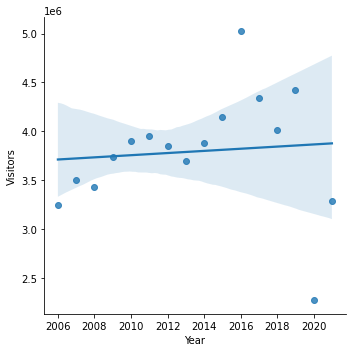

In [237]:
# Plot all Yosemite data
yosemite_df = national_park_df[national_park_df["Park"]=="Yosemite"]
sns.lmplot(data=yosemite_df, x='Year',y='Visitors')

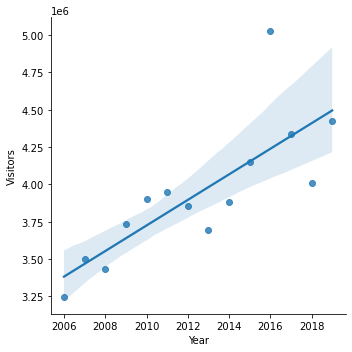

In [243]:
# Plot Yosemite data before 2020
precovid_df = national_park_df[(national_park_df["Park"]=="Yosemite") & (national_park_df['Year']<2020)]
sns.lmplot(data = precovid_df, x = 'Year', y='Visitors')

**What are the differences between the figures? What changed, and why does it affect our model's fit?**

The first figure shows not so clear/positive correlation between two variables while second figure shows consistant, clear, positive correlation between Visitors and Year. 

Regression linear line fit for our model greatly improved, showing clear correlation between Years and Visitors after only including data before 2020. The unexpected, unusual sharp decrease in visitor number due to Covid pandemic "messed up" our model's fit. The data in 2020 works as outliers that makes the fit worse. 

## Problem 10 (10 points)
From this point on, **we will only work with data prior to the pandemic**. Create a new version of `national_park_df` where the latest possible year is 2019. 

Then, using either pandas or SQL (whichever you prefer) create two new tables with only the most visited and least visited park data. Do the following:
- Create a new table called `average_park_visitors_df` that groups data by park and finds the overall average of visitors. 
  - note: if you use pandas, you may need to reset the index. 
- Sort values in this table by number of average visitors, in **descending** order. 
- Create a list of the top four parks in a variable called `most_visited_parks` and a list of the lowest four parks in a variable called `least_visited_parks`. Print these lists. 
- Create two tables, `most_visited_parks_df` and `least_visited_parks_df` that only have data from the appropriate list of parks. 


In [248]:
# Remove years above 2019 from national_park_df
pre2019_national_park_df = national_park_df[(national_park_df['Year']<2020)]

In [251]:
import duckdb, sqlalchemy
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [254]:
# Create and print lists of most and least visited parks
%sql average_park_visitors_df << SELECT Park, AVG(Visitors) FROM pre2019_national_park_df GROUP BY park ORDER BY Avg(Visitors) DESC
%sql SELECT * FROM average_park_visitors_df

Returning data to local variable average_park_visitors_df


,Park,"avg(""Visitors"")"
0,Great Smoky Mountains,1.015303e+07
1,Grand Canyon,4.999693e+06
2,Yosemite,3.938812e+06
3,Yellowstone,3.583847e+06
4,Rocky Mountain,3.527022e+06
...,...,...
58,National Park of American Samoa,1.927543e+04
59,Isle Royale,1.892643e+04
60,Lake Clark,1.260864e+04
61,Gates of the Arctic,1.081550e+04


In [279]:
# Create dataframes for most and least visited parks
most_visited_parks = average_park_visitors_df['Park'].iloc[:4].tolist()
least_visited_parks = average_park_visitors_df['Park'].iloc[-4:].tolist()

print("Most visited: ", most_visited_parks)
print("Least visited: ", least_visited_parks)

Most visited:  ['Great Smoky Mountains', 'Grand Canyon', 'Yosemite', 'Yellowstone']
Least visited:  ['Isle Royale', 'Lake Clark', 'Gates of the Arctic', 'Kobuk Valley']


In [280]:
%sql most_visited_parks_df << SELECT * FROM pre2019_national_park_df WHERE Park IN ('Great Smoky Mountains', 'Grand Canyon', 'Yosemite', 'Yellowstone')
%sql least_visited_parks_df << SELECT * FROM pre2019_national_park_df WHERE Park IN ('Isle Royale', 'Lake Clark', 'Gates of the Arctic', 'Kobuk Valley')
most_visited_parks_df

Returning data to local variable most_visited_parks_df
Returning data to local variable least_visited_parks_df


,Park,State(s),Region,Year,Visitors
0,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2019,12547743
1,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2018,11421200
2,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2017,11338893
3,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2016,11312786
4,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2015,10712674
5,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2014,10099276
6,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2013,9354695
7,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2012,9685829
8,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2011,9008830
9,Great Smoky Mountains,North Carolina/Tennessee,Southeast,2010,9463538


In [281]:
least_visited_parks_df

,Park,State(s),Region,Year,Visitors
0,Isle Royale,Michigan,Midwest,2019,26410
1,Isle Royale,Michigan,Midwest,2018,25798
2,Isle Royale,Michigan,Midwest,2017,28196
3,Isle Royale,Michigan,Midwest,2016,24966
4,Isle Royale,Michigan,Midwest,2015,18684
5,Isle Royale,Michigan,Midwest,2014,14560
6,Isle Royale,Michigan,Midwest,2013,16274
7,Isle Royale,Michigan,Midwest,2012,16663
8,Isle Royale,Michigan,Midwest,2011,15892
9,Isle Royale,Michigan,Midwest,2010,15793


# Problem 11 (10 points)

- Create a plotting function, `plot_by_park` that takes any dataframe and creates a linear regression plot (again with `lmplot`). Use the `hue` parameter to plot multiple park's regression model fit on the same graph.
- Plot a linear regression model for the most visited parks, but use the `hue` parameter to keep each park's data distinct. Do the same for least visited parks in a second figure. 

In [296]:
# Create plotting function
def plot_by_park(df):
    sns.lmplot(data=df, x='Year',y='Visitors',hue = "Park")

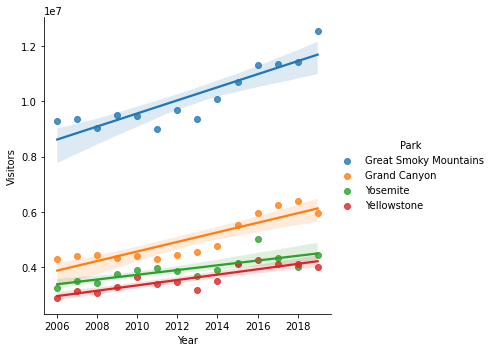

In [297]:
# Plot most visited parks
plot_by_park(most_visited_parks_df)

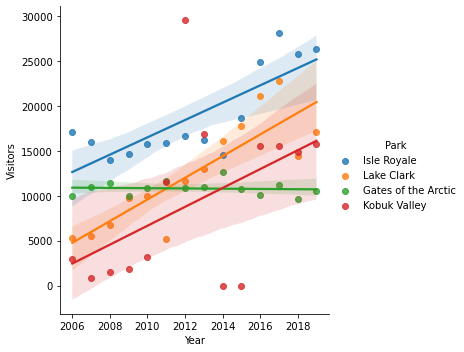

In [298]:
# Plot least visited parks
plot_by_park(least_visited_parks_df)

## Problem 12 (5 points)
Use a combination of `groupby` and `plot_by_park` to plot a regression for each region, subset by park. 

**Confidence check:** You should print out a plot for each region. Each region's plot should have the same number of regression lines as parks in that region. 

""


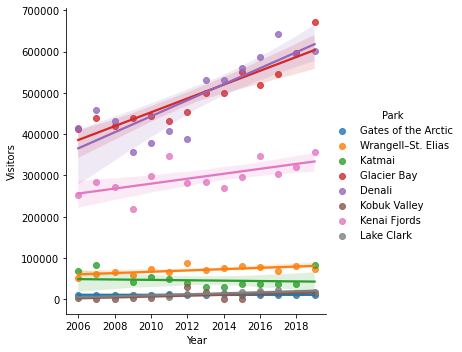

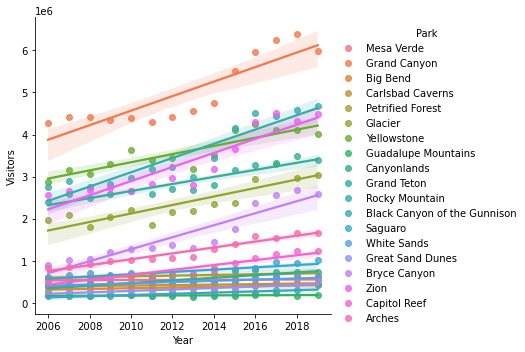

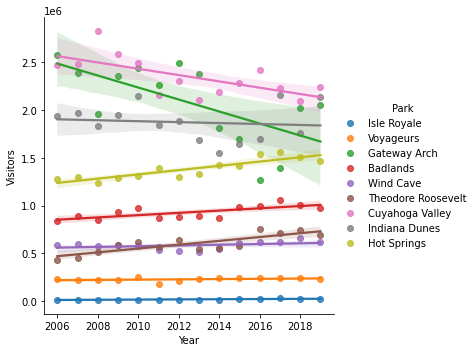

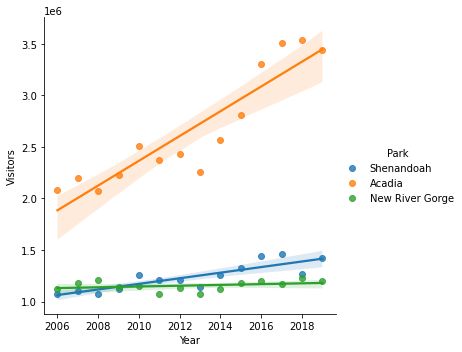

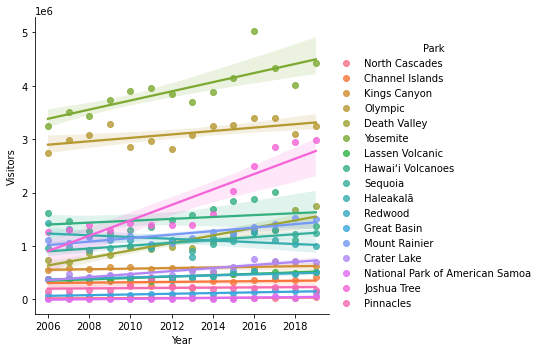

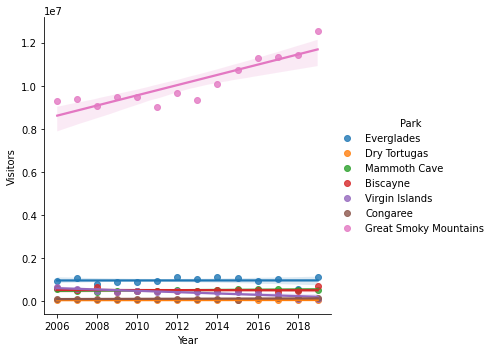

In [313]:
# Print parks by region
pre2019_national_park_df.groupby(["Region"]).apply(plot_by_park)

## Problem 13 (5 points)
In the last problem, you plotted regressions for each region. Review these figures, and then consider the following:
- How could these figures be improved? Identify three ways that the plots could better visualize this information. 
- Implement one improvement. 


**Three improvements:**
1. I could plot a regression for each region, subset by States to compare regression line between each states within the same region.
2. I could plot a regression for 10 most visited states, subset by 
3. I could remove a most visited and a least visited park from each states and then plot regression for each region, subset by parks. 

In [323]:
# implement one change here
def plot_by_states(df):
    sns.lmplot(data=df, x='Year',y='Visitors',hue = "State(s)")

""


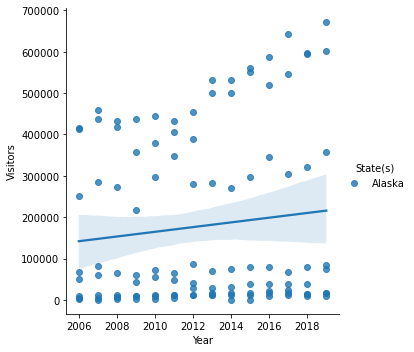

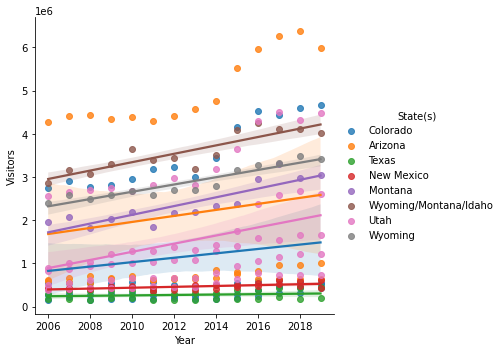

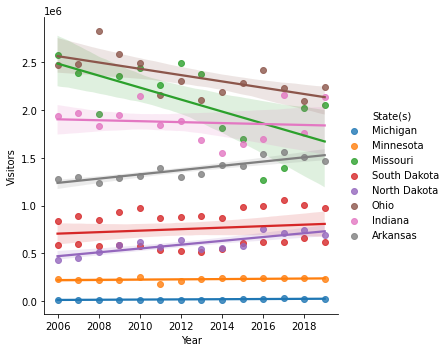

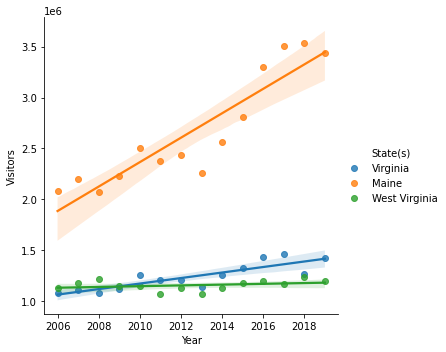

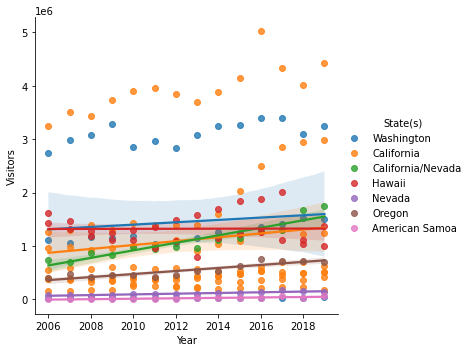

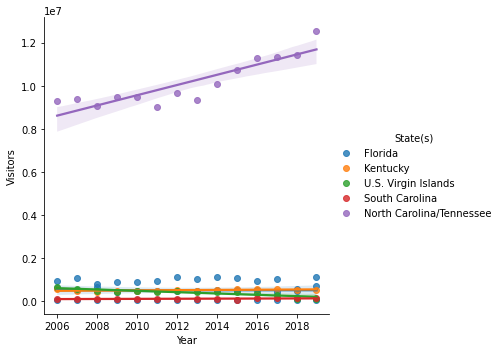

In [320]:
pre2019_national_park_df.groupby(["Region"]).apply(plot_by_states)